<a href="https://colab.research.google.com/github/cul-data-club/meetings/blob/main/2022/march-24-geopandas/Hello%2C%20GeoPandas!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hello, GeoPandas (2022 Edition)!

[GeoPandas](https://geopandas.org/en/stable/) is a library that aims to make working with spatial data in Python “easier,” largely be incorporating the [Pandas](https://pandas.pydata.org/) syntax we know and love. 

Google Colab does not ship with GeoPandas, so step one is to install it and a few other libraries, which we'll do in the cell below. If you're trying to install it on your home machine with Anaconda, you'll have to use the `-c conda-forge` flag, like this:

```
conda install -c conda-forge geopandas
```

You can also install from Anaconda Navigator.

In [24]:
!{sys.executable} -m pip uninstall -y folium
!{sys.executable} -m pip install -Iv folium==0.12.1

Found existing installation: folium 0.12.1
Uninstalling folium-0.12.1:
  Successfully uninstalled folium-0.12.1
Using pip 21.1.3 from /usr/local/lib/python3.7/dist-packages/pip (python 3.7)
Value for scheme.platlib does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
Value for scheme.purelib does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
Value for scheme.headers does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/include/python3.7/UNKNOWN
sysconfig: /usr/include/python3.7m/UNKNOWN
Value for scheme.scripts does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/bin
sysconfig: /usr/bin
Value for scheme.data does not match. Please report this to <http

In [2]:
# Install geopandas and other spatial libraries
# You only need to run this cell once per session

import sys
!{sys.executable} -m pip install geopandas
!{sys.executable} -m pip install cartopy
!{sys.executable} -m pip install geoplot
!{sys.executable} -m pip install contextily

Geographic data can take several primitive forms. The [GeoData@Columbia](https://geodata.library.columbia.edu/) offers ten different primitive formats the data can take, but they boil down to four, more or less:

1. **Points** With point data, every observation/row/member is at least two coordinates. Each point is independent of the others.
2. **Lines** Instead of one point, every observation/row/member is at least two points connected with a line, where order matters.
3. **Polygons** Like lines, except the lines close to make shapes with calculable areas.
4. **Rasters** “Pictures” of the area under study, where each pixel represents a certain amount of space, like with satellite photography or other remote sensing data sources.

The first three types, as a whole, are called “vector data.”

For vector data, every observation/row/member will typically have other properties that can take familiar data types: numeric variables, continuous variables, and categoric variables.

GeoPandas, then, merges the “geometry” of an observation/row/member with its other properties to create a dataframe with geometries.

Even though geospatial data typically only has the four primitives mentioned above (often in some mixture), the data can be *formatted* in many, many ways. For GeoPandas, we will look at two file formats:

1. **Shapefile** Created by Esri, the company behind ArcGIS, [shapefiles](https://en.wikipedia.org/wiki/Shapefile) are an established vector format. Every shapefile is actually a combination of files, including one that ends in `*.shp`, which are often bundled together as a `.zip`. GeoPandas can read them even as `.zip` files without unbundling.
2. **GeoJSON** A comparative newcomer to geospatial data encoding, [GeoJSON](http://geojson.org/) encodes all of the data into a giant, plain text file formatted as JSON, or JavaScript Object Notation. As such, every GeoJSON data file is also a valid JavaScript object. With only one file, GeoJSON is somewhat more portable than shapefiles, and the file format is especially web-friendly.

You can create your own toy GeoJSON data at [http://geojson.io/](http://geojson.io/)

In fact, go ahead and so so, and save your file as `test.json` or something similar. Then you can upload the file to your Colab.

Now let’s import GeoPandas and fire up inline Matplotlib.

In [3]:
import geopandas
%matplotlib inline

GeoPandas has a few datasets built in: two from [Natural Earth](http://naturalearth.org), and one of NYC. Just like with regular Pandas, we can use a `.read_file()` class method to create a geodataframe from a file. Here, we can read in the built-in NYC data.

GeoDataFrames have a built-in `.plot()` method.

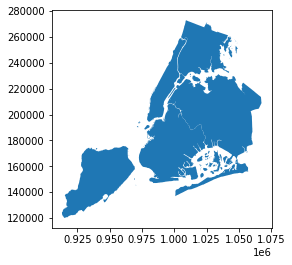

In [4]:
nyc = geopandas.read_file(geopandas.datasets.get_path('nybb'))
nyc.plot()

They also have an `.explore()` method that creates an interactive map with some more context.

In [22]:
nyc.explore("Shape_Area")

TypeError: ignored

Geodataframes also have a `.crs` property that gives us the coordinate reference system, which yields an EPSG code. That we can subsequently look up like so: [http://spatialreference.org/ref/epsg/2263/](http://spatialreference.org/ref/epsg/2263/)

In [5]:
nyc.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

We can read in our own GeoJSON file now, but note that the CRS is different from the NYC data’s.

In [7]:
gdf = geopandas.read_file("https://raw.githubusercontent.com/cul-data-club/meetings/main/2019/geopandas/test.json")
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Luckily, unifying the CRSes is rather trivial. Just set one’s to the other’s.

In [8]:
gdf = df.to_crs(nyc.crs)
gdf.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Geodataframes behave much like regular dataframes.

In [9]:
gdf

,sentiment,geometry
0,happy,"POLYGON ((995783.359 238221.933, 994655.748 23..."
1,sad,"POLYGON ((984338.938 206523.263, 983845.338 20..."


In [10]:
df[df.sentiment.str.contains("happy")]

,sentiment,geometry
0,happy,"POLYGON ((995783.359 238221.933, 994655.748 23..."


We can plot data together by using one plot as the `ax` for the other.

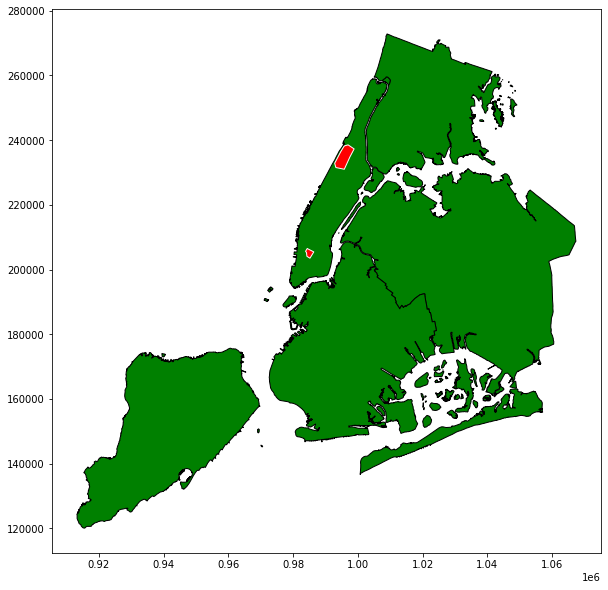

In [11]:
base = nyc.plot(figsize=(10, 10), edgecolor="k", color="green")
df.plot(ax=base, color="red", edgecolor="white")

## NYC MTA data

Now let’s grab the [subway station location data](https://data.cityofnewyork.us/Transportation/Subway-Stations/arq3-7z49) from the City of New York. Export it as a shapefile and upload the `.zip` to Colab.

In [14]:
stations = geopandas.read_file("./SubwayStations.zip")
stations.head()

,line,name,notes,objectid,url,geometry
0,4-6-6 Express,Astor Pl,"4 nights, 6-all times, 6 Express-weekdays AM s...",1.0,http://web.mta.info/nyct/service/,POINT (-73.99107 40.73005)
1,4-6-6 Express,Canal St,"4 nights, 6-all times, 6 Express-weekdays AM s...",2.0,http://web.mta.info/nyct/service/,POINT (-74.00019 40.71880)
2,1-2,50th St,"1-all times, 2-nights",3.0,http://web.mta.info/nyct/service/,POINT (-73.98385 40.76173)
3,2-3-4,Bergen St,"4-nights, 3-all other times, 2-all times",4.0,http://web.mta.info/nyct/service/,POINT (-73.97500 40.68086)
4,3-4,Pennsylvania Ave,"4-nights, 3-all other times",5.0,http://web.mta.info/nyct/service/,POINT (-73.89489 40.66471)


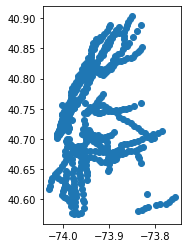

In [15]:
stations.plot()

And that's about it. 